In [1]:
import os
path = '/content/drive/MyDrive/CIS520 Machine Learning 2020FALL/project'
os.chdir(path)
os.listdir(path)

['data.csv',
 'logistic_regression_baseline.ipynb',
 'knn_baseline.ipynb',
 'data_preview.ipynb',
 'random_forest_baseline.ipynb',
 'Untitled0.ipynb']

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# Prepare datasets

In [3]:
def prepare_data():
  data = pd.read_csv('data.csv')
  labelencoder_y = LabelEncoder()
  data['diagnosis'] = labelencoder_y.fit_transform(data['diagnosis'])
  df_output = data.dropna(axis='columns')

  return df_output


data = prepare_data()

dataset with all features

In [39]:
def all_feature(df_input):
  y = df_input['diagnosis']
  X = df_input.drop(['id', 'diagnosis'], axis=1)

  return X, y


X_af, y_af = all_feature(data)
sc = StandardScaler()
X_af = sc.fit_transform(X_af)
X_train_af, X_test_af, y_train_af, y_test_af = train_test_split(X_af, y_af, test_size=0.3, random_state=99)
print("training data points: {}".format(X_train_af.shape))
print("testing data points: {}".format(X_test_af.shape))

training data points: (398, 30)
testing data points: (171, 30)


dataset with 'mean' features

In [34]:
def mean_feature(df_input):
  feature_selected = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

  X = df_input[feature_selected]
  y = df_input['diagnosis']

  return X, y


X_mf, y_mf = mean_feature(data)
sc = StandardScaler()
X_mf = sc.fit_transform(X_mf)
X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, test_size=0.3, random_state=99)
print("training data points: {}".format(X_train_mf.shape))
print("testing data points: {}".format(X_test_mf.shape))

training data points: (398, 10)
testing data points: (171, 10)


dataset with 'worst' features


In [35]:
def worst_feature(df_input):
  feature_selected = ['radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 
       'smoothness_worst','compactness_worst', 'concavity_worst', 
       'concave points_worst','symmetry_worst', 'fractal_dimension_worst']

  X = df_input[feature_selected]
  y = df_input['diagnosis']

  return X, y


X_wf, y_wf = worst_feature(data)
sc = StandardScaler()
X_wf = sc.fit_transform(X_wf)
X_train_wf, X_test_wf, y_train_wf, y_test_wf = train_test_split(X_wf, y_wf, test_size=0.3, random_state=99)
print("training data points: {}".format(X_train_mf.shape))
print("testing data points: {}".format(X_test_mf.shape))

training data points: (398, 10)
testing data points: (171, 10)


# Baseline

## With 'mean' features as a start
'mean' features containes most information about a cell, so we choose to use 'mean' features to train our Random Forest model and get a baseline.

In [73]:
def rf_score(X_train, y_train, X_test, y_test):
  clf = RandomForestClassifier(criterion='entropy', random_state=10)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  return accuracy, recall, report

### Stage 1 baseline

In [74]:
acc_mf, rec_mf, rpt_mf = rf_score(X_train_mf, y_train_mf, X_test_mf, y_test_mf)

print('Baseline accuracy:', acc_mf)
print('Baseline recall:', rec_mf)
print(rpt_mf)

Baseline accuracy: 0.9532163742690059
Baseline recall: 0.8793103448275862
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       113
           1       0.98      0.88      0.93        58

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



# Tuning

## Try different datasets

### Stage 2 baseline (with all features)

In [76]:
acc_af, rec_af, rpt_af = rf_score(X_train_af, y_train_af, X_test_af, y_test_af)

print('Accuracy with all features:', acc_af)
print('Recall with all features:', rec_af)
print(rpt_af)

Accuracy with all features: 0.9707602339181286
Recall with all features: 0.9137931034482759
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       113
           1       1.00      0.91      0.95        58

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



### With 'worst' features

In [77]:
acc_wf, rec_wf, rpt_wf = rf_score(X_train_wf, y_train_wf, X_test_wf, y_test_wf)

print('Accuracy with WORST features:', acc_wf)
print('Recall with WORST features:', rec_wf)
print(rpt_wf)

Accuracy with WORST features: 0.9766081871345029
Recall with WORST features: 0.9482758620689655
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       113
           1       0.98      0.95      0.96        58

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



It seems that there is a tradeoff between accuracy and recall. We can get better recall with 'worst' features, while we can get better accuracy with all features. In order not to miss any information, we use all features as a second-stage baseline.

## Cross Validation

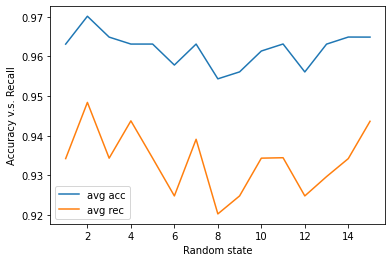

Best average cross-val acc: 0.9701288619779538
corresponding n: 2
Best average cross-val rec: 0.9483942414174973
corresponding n: 2


In [82]:
pool_randomstate = range(1, 16)
avg_accs = []
avg_recs = []

for item in pool_randomstate:
  clf = RandomForestClassifier(criterion='entropy', random_state=item)
    
  accs = cross_val_score(clf, X_af, y_af, cv=5, scoring='accuracy')
  recs = cross_val_score(clf, X_af, y_af, cv=5, scoring='recall')
  avg_accs.append(np.average(accs))
  avg_recs.append(np.average(recs))

plt.plot(pool_randomstate, avg_accs, label='avg acc')
plt.plot(pool_randomstate, avg_recs, label='avg rec')
plt.xlabel("Random state")
plt.ylabel("Accuracy v.s. Recall")
plt.legend(loc='best')
plt.show()

print('Best average cross-val acc:', np.max(avg_accs))
print('corresponding n:', pool_randomstate[avg_accs.index(np.max(avg_accs))])
print('Best average cross-val rec:', np.max(avg_recs))
print('corresponding n:', pool_randomstate[avg_recs.index(np.max(avg_recs))])

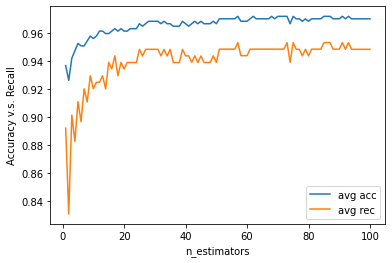

Best average cross-val acc: 0.9718987734823784
corresponding n: 57
Best average cross-val rec: 0.953156146179402
corresponding n: 57


In [83]:
pool_estimators = range(1, 101)
avg_accs = []
avg_recs = []

for item in pool_estimators:
  clf = RandomForestClassifier(n_estimators=item, criterion='entropy', random_state=2)
    
  accs = cross_val_score(clf, X_af, y_af, cv=5, scoring='accuracy')
  recs = cross_val_score(clf, X_af, y_af, cv=5, scoring='recall')
  avg_accs.append(np.average(accs))
  avg_recs.append(np.average(recs))

plt.plot(pool_estimators, avg_accs, label='avg acc')
plt.plot(pool_estimators, avg_recs, label='avg rec')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy v.s. Recall")
plt.legend(loc='best')
plt.show()

print('Best average cross-val acc:', np.max(avg_accs))
print('corresponding n:', pool_estimators[avg_accs.index(np.max(avg_accs))])
print('Best average cross-val rec:', np.max(avg_recs))
print('corresponding n:', pool_estimators[avg_recs.index(np.max(avg_recs))])

### Stage 3 baseline (with CV)
We pick n_estimators = 57 and random_state = 2.

In [88]:
def rf_score_cv(X_train, y_train, X_test, y_test):
  clf = RandomForestClassifier(n_estimators=57, criterion='entropy', random_state=2)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  return accuracy, recall, report


acc_af_cv, rec_af_cv, rpt_af_cv = rf_score_cv(X_train_af, y_train_af, X_test_af, y_test_af)

print('Accuracy with all features:', acc_af_cv)
print('Recall with all features:', rec_af_cv)
print(rpt_af_cv)

Accuracy with all features: 0.9766081871345029
Recall with all features: 0.9310344827586207
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       113
           1       1.00      0.93      0.96        58

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Both accuracy and recall improves. These are out third-stage baseline.

## Feature selection (RFE)
There are still noise in our data since we are using all the features to train out model. We want to select the best features that help us distinguish between M and B, so we use Recursive Feature Elimination.

### Choosing the best number of features

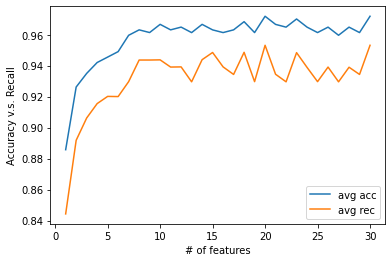

Best acc: 0.9718987734823784
corresponding k: 30
Best rec: 0.953156146179402
corresponding k: 20


In [92]:
def recursive_elimination(X_all, y_all):
  k_values = range(1, 31)
  avg_accs = []
  avg_recs = []

  for item in k_values:
    clf = RandomForestClassifier(n_estimators=57, criterion='entropy', random_state=2)
    selector = RFE(clf, n_features_to_select=item)
    X_new = selector.fit_transform(X_all, y_all)

    accs = cross_val_score(clf, X_new, y_all, cv=5)
    recs = cross_val_score(clf, X_new, y_all, cv=5, scoring='recall')
    avg_accs.append(np.average(accs))
    avg_recs.append(np.average(recs))

  plt.plot(k_values, avg_accs, label='avg acc')
  plt.plot(k_values, avg_recs, label='avg rec')
  plt.xlabel("# of features")
  plt.ylabel("Accuracy v.s. Recall")
  plt.legend(loc='best')
  plt.show()

  print('Best acc:', np.max(avg_accs))
  print('corresponding k:', k_values[avg_accs.index(np.max(avg_accs))])
  print('Best rec:', np.max(avg_recs))
  print('corresponding k:', k_values[avg_recs.index(np.max(avg_recs))])


recursive_elimination(X_af, y_af)

we choose k=20 to pick the best 20 features

In [97]:
df_X = data.drop(['id', 'diagnosis'], axis=1)
clf = RandomForestClassifier(n_estimators=57, criterion='entropy', random_state=2)
rfe = RFE(estimator=clf, n_features_to_select=20)
rfe = rfe.fit(X_train_af, y_train_af)
print('Best 20 features:',df_X.columns[rfe.support_])

Best 20 features: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concavity_mean', 'concave points_mean', 'radius_se',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Test result with tuned hyper parameter and selected feature

In [114]:
feature_selected = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concavity_mean', 'concave points_mean', 'radius_se',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

data_selected = data[feature_selected]
label_selected = data['diagnosis']

sc = StandardScaler()
X_s = sc.fit_transform(data_selected)
y_s = label_selected
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.3, random_state=99)
print("training data points: {}".format(X_train_s.shape))
print("testing data points: {}".format(X_test_s.shape))

training data points: (398, 20)
testing data points: (171, 20)


### Stage 4 result (with feature selected)

In [115]:
acc_s_cv, rec_s_cv, rpt_s_cv = rf_score_cv(X_train_s, y_train_s, X_test_s, y_test_s)

print('Accuracy with all features:', acc_s_cv)
print('Recall with all features:', rec_s_cv)
print(rpt_s_cv)

Accuracy with all features: 0.9824561403508771
Recall with all features: 0.9482758620689655
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       113
           1       1.00      0.95      0.97        58

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



### Visualize the features selected
To see if these feature are the best ones intuitively.

In [110]:
def swarm_figure(data_features, data_labels):
  sns.set(style="whitegrid", palette="muted")
  data_dia = data_labels
  data = data_features

  data_n_2 = (data - data.mean()) / (data.std()) # standardization
  data = pd.concat([data_dia, data_n_2.iloc[:,0:21]], axis=1)
  data = pd.melt(data,id_vars="diagnosis", var_name="features", value_name='value')

  plt.figure(figsize=(10,10))
  sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, size=2)
  plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; y

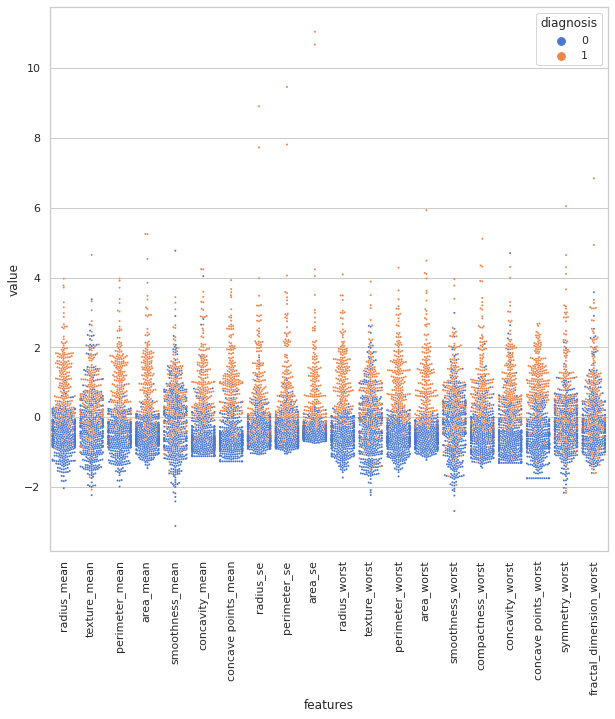

In [111]:
swarm_figure(data_selected, label_selected)